<a href="https://colab.research.google.com/github/Kymapo/AMATH581/blob/main/AMATH581HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## a)

Eigenvalue for mode 1: 0.9999999767751432
Eigenvalue for mode 2: 2.9999994019628513
Eigenvalue for mode 3: 4.999989531433673
Eigenvalue for mode 4: 6.999883196747387
Eigenvalue for mode 5: 8.999060748016912


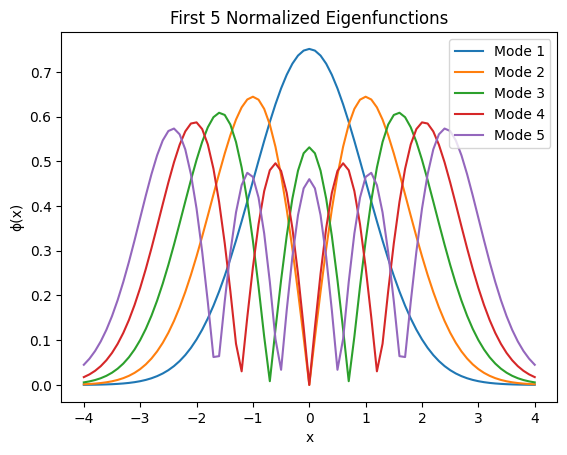

[[2.56183470e-04 1.45461736e-03 5.66711044e-03 1.74588478e-02
  4.50516661e-02]
 [3.76940965e-04 2.08377489e-03 7.88695717e-03 2.35399845e-02
  5.86293779e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583010e-02
  7.58484060e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281014e-02
  9.71899182e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048300e-02
  1.23080912e-01]
 [1.64382706e-03 8.13893182e-03 2.73391697e-02 7.15653866e-02
  1.53831248e-01]
 [2.32055909e-03 1.11600069e-02 3.63163649e-02 9.17795064e-02
  1.89559871e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171083e-01
  2.30113257e-01]
 [4.48904553e-03 2.03165046e-02 6.18486349e-02 1.45069155e-01
  2.74981571e-01]
 [6.15097107e-03 2.69674234e-02 7.92584569e-02 1.78649429e-01
  3.23220562e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868662e-01
  3.73389602e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395937e-01
  4.23518000e-01]
 [1.49032591e-02 5.90146385e-02 1.547089

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system based on d²ϕ/dx² - (Kx² - ε)ϕ = 0
def shoot_system(phi, x, epsilon, K):
    return [phi[1], (K * x**2 - epsilon) * phi[0]]

# Normalize the eigenfunction
def normalize(psi, x):
    norm = np.trapz(y = (psi)**2, x = x)  # Numerical integration for normalization
    return psi / np.sqrt(norm)  # Normalize by sqrt of the integral

# Parameters
L = 4  # Range boundary (x ∈ [-L, L])
h = 0.1  # Step size
x = np.arange(-L, L + h, h)  # Discretized x values from -L to L
phi0 = [1, 1]  # Initial conditions for ϕ(-L) = 0 and arbitrary ϕ'(-L) = 1
K = 1  # Potential constant, modify this as needed
tol = 1e-4  # Tolerance for convergence

eigenvalues = []
eigenfunctions = []

# Guessed initial eigenvalues for the first 5 modes
epsilon = 0

# Shooting scheme loop over the first 5 modes
for modes in range(1, 6):
    delta_epsilon = 0.1  # Step size for adjusting the eigenvalue
    epsilon += delta_epsilon

    phi0 = [1, np.sqrt(K * L**2 - epsilon)]

    # Begin convergence loop for eigenvalue (epsilon)
    for _ in range(1000):
        psi = odeint(shoot_system, phi0, x, args=(epsilon, K))  # Solve the ODE
        phi0 = [1, np.sqrt(K * L**2 - epsilon)]

        if abs(psi[-1,1] + np.sqrt(K * L**2 - epsilon) * psi[-1,0]) < tol:  # If the boundary condition at x = L is satisfied
            print(f"Eigenvalue for mode {modes}: {epsilon}")
            break  # Convergence reached

        # Adjust epsilon based on the boundary condition at x = L
        if (-1)**(modes + 1) * (psi[-1,1] + np.sqrt(K*L**2 - epsilon) * psi[-1,0]) > 0:
            epsilon += delta_epsilon  # Increase epsilon
        else:
            epsilon -= delta_epsilon / 2  # Refine the step size and decrease epsilon
            delta_epsilon /= 2  # Reduce step size for finer convergence
    # Normalize the eigenfunction after finding eigenvalue
    normalized_psi = normalize(psi[:,0], x)

    # Append the normalized eigenfunction and eigenvalue
    eigenfunctions.append(np.abs(normalized_psi))
    eigenvalues.append(epsilon)

# Convert results to numpy arrays
eigenfunctions_matrix = np.column_stack(eigenfunctions)  # 5-column matrix for eigenfunctions
eigenvalues_vector = np.array(eigenvalues)  # 1x5 vector for eigenvalues

# Plot the eigenfunctions
for i in range(5):
    plt.plot(x, eigenfunctions_matrix[:, i], label=f"Mode {i + 1}")

plt.title("First 5 Normalized Eigenfunctions")
plt.xlabel("x")
plt.ylabel("ϕ(x)")
plt.legend()
plt.show()

# Output the eigenfunctions matrix and eigenvalues vector
print(eigenfunctions_matrix)
print('')
print(eigenvalues_vector)

A1 = eigenfunctions_matrix
A2 = eigenvalues_vector

## b)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


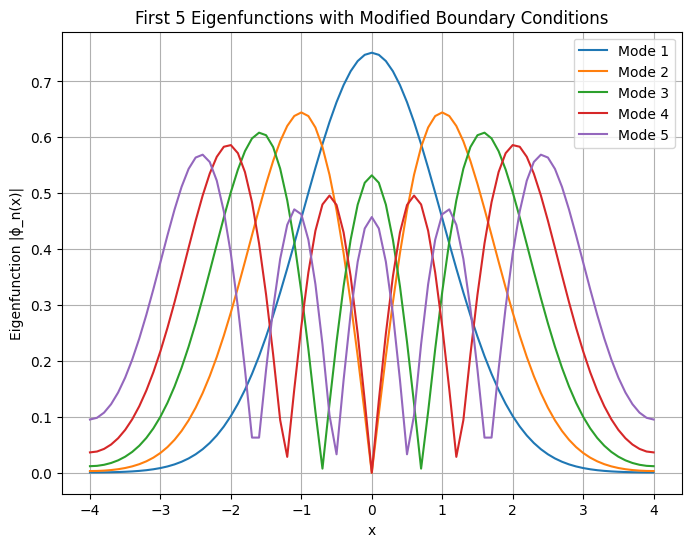

A3 (Eigenfunctions Matrix):
 [[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645543e-02 1.25018106e-01 2.59248830e-01
  4.24643293e-01]
 [1.4901855

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs

# Parameters
L = 4  # Domain from -L to L
h = 0.1  # Step size
K = 1  # Potential constant
x = np.arange(-L, L+h, h)  # Discretized x-domain
N = len(x)  # Number of grid points

# Potential term (Kx^2)
#V = K * x**2  # Potential energy term for the harmonic oscillator

# Initialize matrix
H = np.zeros((N-2, N-2))

# Fill the matrix for the internal points using central differences
for i in range(N-2):
    H[i, i] = -2 - x[i+1]**2 * h**2  # Main diagonal
    if i < N -3:
      H[i, i+1] = 1  # Lower diagonal
      H[i+1, i] = 1  # Upper diagonal

# Left boundary (x = -L)

H[0, 0] += 4/3  # Modify the main diagonal for the left boundary                 # DO YOU DIVIDE THESE BY 2h OR h**2? (check pg. 72)
H[0, 1] -= 1/3  # Off-diagonal from forward difference

# Right boundary (x = L)
H[-1, -1] += 4/3 # Modify the main diagonal for the right boundary
H[-1, -2] -= 1/3 # Off-diagonal from backward difference

#H[0, -1] = 1                                                           # Are these needed?
#H[-1, 0] = 1

#print(H)

#H /= 2*h

# Solve the eigenvalue problem using eigs (for full matrix)
eigenvalues, eigenfunctions = eigs(-H, which='SM')

eigenfunctions_matrix = np.vstack([4/3 * eigenfunctions[0, :] - 1/3 * eigenfunctions[1, :], eigenfunctions, 4/3 * eigenfunctions[-1, :] - 1/3 *eigenfunctions[-2, :]])


# Extract the first 5 eigenfunctions and eigenvalues
eigenvalues_vector = np.sort(eigenvalues[:5] / h**2)  # First 5 eigenvalues
#print(eigenvalues_vector)
#breakpoint()

# Normalize the eigenfunctions
for i in range(5):
    norm = np.sqrt(np.trapz
    (y=eigenfunctions_matrix[:, i]**2, x=x))
    eigenfunctions_matrix[:, i] = np.abs(eigenfunctions_matrix[:, i]) / (norm)

# Plot the eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, eigenfunctions_matrix[:, i], label=f"Mode {i+1}")
plt.xlabel('x')
plt.ylabel('Eigenfunction |ϕ_n(x)|')
plt.title('First 5 Eigenfunctions with Modified Boundary Conditions')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
A3 = eigenfunctions_matrix[:,:5]
A3 = A3.real
A4 = eigenvalues_vector
A4 = A4.real
print("A3 (Eigenfunctions Matrix):\n", A3)
print("A4 (Eigenvalues Vector):\n", A4)

## c)

<ipython-input-3-580fe1a72fd6>:35: RuntimeWarning: invalid value encountered in sqrt
  phi0 = [A, np.sqrt(K * L**2 - epsilon) * A]


Eigenvalue for mode 1: 1.012939453125
Eigenvalue for mode 2: 2.9213867187500013
Eigenvalue for mode 1: 0.9740478515625
Eigenvalue for mode 2: 2.8931152343750006


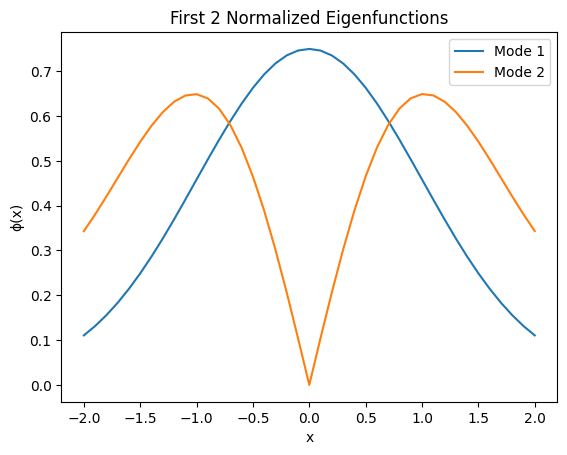

A5 (Eigenfunctions Matrix):
 [[1.10631451e-01 3.42990728e-01]
 [1.31424345e-01 3.80302889e-01]
 [1.55619454e-01 4.20312078e-01]
 [1.83283757e-01 4.61682600e-01]
 [2.14393321e-01 5.02878502e-01]
 [2.48813475e-01 5.42255947e-01]
 [2.86298808e-01 5.78063211e-01]
 [3.26493169e-01 6.08440686e-01]
 [3.69022338e-01 6.31542987e-01]
 [4.13244362e-01 6.45551064e-01]
 [4.58245819e-01 6.48570902e-01]
 [5.03107494e-01 6.39161977e-01]
 [5.46905266e-01 6.16355418e-01]
 [5.88710103e-01 5.79654003e-01]
 [6.27588064e-01 5.29032164e-01]
 [6.62600299e-01 4.64988433e-01]
 [6.92803050e-01 3.88678588e-01]
 [7.17247649e-01 3.01721100e-01]
 [7.35082823e-01 2.06180493e-01]
 [7.45917282e-01 1.04568746e-01]
 [7.49520959e-01 1.54703473e-04]
 [7.45831762e-01 1.04706895e-01]
 [7.34961943e-01 2.06214741e-01]
 [7.17198095e-01 3.01763157e-01]
 [6.93001152e-01 3.88798899e-01]
 [6.63006392e-01 4.65209592e-01]
 [6.28023434e-01 5.29323725e-01]
 [5.89035134e-01 5.79933857e-01]
 [5.47104306e-01 6.16574101e-01]
 [5.03241694e-

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE system based on d²ϕ/dx² - (Kx² - ε)ϕ = 0
def shoot_system2(x, phi, epsilon, K, gamma):
    return [phi[1], (gamma * phi[0]**2 + K * x**2 - epsilon) * phi[0]]

# Normalize the eigenfunction
def normalize(psi, x):
    norm = np.trapz(y = (psi)**2, x = x)  # Numerical integration for normalization
    return psi / np.sqrt(norm)  # Normalize by sqrt of the integral

# Parameters
L = 2.0  # Range boundary (x ∈ [-L, L])
h = 0.1  # Step size
x = np.arange(-L, L+h, h)  # Discretized x values from -L to L
tol = 1e-4  # Tolerance for convergence
phi0 = [tol, tol]  # Initial conditions for ϕ(-L) = 0 and arbitrary ϕ'(-L) = 1
K = 1  # Potential constant, modify this as needed
gamma = 0.05

eigenvalues = []
eigenfunctions = []

for gamma in [0.05, -0.05]:
    # Guessed initial eigenvalues for the first 5 modes
    e0 = 0.1
    A = 1e-6
    # Shooting scheme loop over the first 5 modes
    for modes in range(1, 3):
        dA = 0.01
        delta_epsilon = 0.2  # Step size for adjusting the eigenvalue
        #epsilon += delta_epsilon
        phi0 = [A, np.sqrt(K * L**2 - epsilon) * A]
        # Begin convergence loop for initial guess
        for _ in range(1000):
            epsilon = e0
            delta_epsilon = 0.2
            # Begin convergence loop for eigenvalue (epsilon)
            for _ in range(1000):
                phi0 = [A, np.sqrt(K * L**2 - epsilon) * A]
                sol = solve_ivp(shoot_system2, [x[0], x[-1]], phi0, t_eval=x, args=(epsilon, K, gamma), method='RK45')  # Solve the IVP
                psi = sol.y
                #print(psi[0,0])
                difference = psi[1,-1] + np.sqrt(K*L**2 -epsilon) * psi[0,-1]

                if abs(difference) < tol:  # If the boundary condition at x = L is satisfied
                    break  # Convergence reached

                #print(epsilon)
                if K*L**2 -epsilon<0:
                  exit()
                # Adjust epsilon based on the boundary condition at x = L
                if (-1)**(modes + 1) * (difference) > 0:
                    epsilon += delta_epsilon  # Increase epsilon
                else:
                    epsilon -= delta_epsilon / 2  # Refine the step size and decrease epsilon
                    delta_epsilon /= 2  # Reduce step size for finer convergence

            area = np.trapz(y=psi[0, :]**2, x=x)
            if abs(area - 1) <= tol:
                print(f"Eigenvalue for mode {modes}: {epsilon}")
                break
            if area < 1:
                A += dA
            else:
                A -= dA
                dA /= 2
        e0 += 2
        # Normalize the eigenfunction after finding eigenvalue
        normalized_psi = normalize(psi[0, :], x)

        # Append the normalized eigenfunction and eigenvalue
        eigenfunctions.append(np.abs(normalized_psi))
        eigenvalues.append(epsilon)

# Convert results to numpy arrays
eigenfunctions_matrix = np.column_stack(eigenfunctions)  # 2-column matrix for eigenfunctions
eigenvalues_vector = np.array(eigenvalues)  # 1x2 vector for eigenvalues

# Plot the eigenfunctions
for i in range(2):
    plt.plot(x, eigenfunctions_matrix[:, i], label=f"Mode {i + 1}")

plt.title("First 2 Normalized Eigenfunctions")
plt.xlabel("x")
plt.ylabel("ϕ(x)")
plt.legend()
plt.show()

# Output the eigenfunctions matrix and eigenvalues vector
A5 = eigenfunctions_matrix[:,:2]
A6 = eigenvalues_vector[:2]
A7 = eigenfunctions_matrix[:,2:]
A8 = eigenvalues_vector[2:]

print("A5 (Eigenfunctions Matrix):\n", A5)
print("A6 (Eigenvalues Vector):\n", A6)
print("A7 (Eigenfunctions Matrix):\n", A7)
print("A8 (Eigenvalues Vector):\n", A8)

d)

Slope for RK45: 5.244667561772169
Slope for RK23: 3.0190995295045018
Slope for Radau: 4.038199269261614
Slope for BDF: 6.457512609631294
A9 (Slopes Vector):
 [5.24466756 3.01909953 4.03819927 6.45751261]


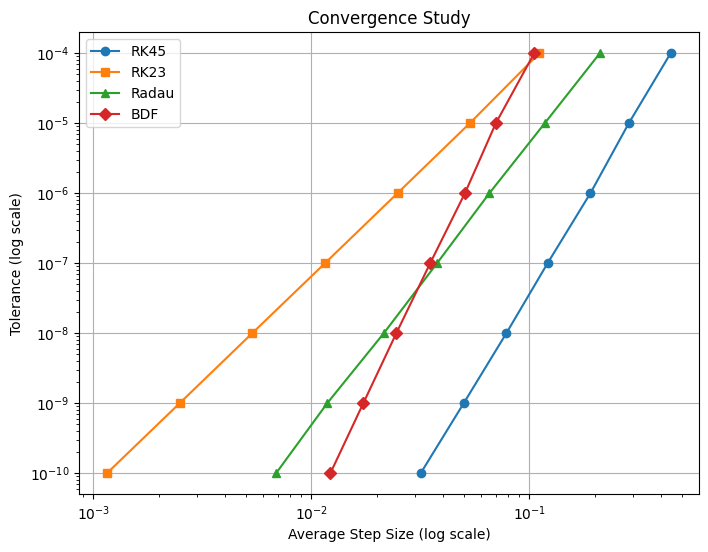

In [31]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def shoot_system(x, phi, epsilon, K):
    return [phi[1], (K * x**2 - epsilon) * phi[0]]

L = 2.0  # Range boundary
K = 1  # Potential constant
epsilon = 1  # Energy value
x_span = [-L, L]  # Integration interval
y0 = [1, np.sqrt(K * L**2 - epsilon)]  # Initial conditions
TOL_values = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]  # Tolerance values

avg_step_sizes_RK45 = []
avg_step_sizes_RK23 = []
avg_step_sizes_Radau = []
avg_step_sizes_BDF = []

for TOL in TOL_values:
    options = {'rtol': TOL, 'atol': TOL}

    # Solve using RK45
    sol_RK45 = solve_ivp(shoot_system, x_span, y0, method='RK45', args=(epsilon, K), **options)
    step_sizes_RK45 = np.diff(sol_RK45.t)
    avg_step_sizes_RK45.append(np.mean(step_sizes_RK45))

    # Solve using RK23
    sol_RK23 = solve_ivp(shoot_system, x_span, y0, method='RK23', args=(epsilon, K), **options)
    step_sizes_RK23 = np.diff(sol_RK23.t)
    avg_step_sizes_RK23.append(np.mean(step_sizes_RK23))

    # Solve using Radau
    sol_Radau = solve_ivp(shoot_system, x_span, y0, method='Radau', args=(epsilon, K), **options)
    step_sizes_Radau = np.diff(sol_Radau.t)
    avg_step_sizes_Radau.append(np.mean(step_sizes_Radau))

    # Solve using BDF
    sol_BDF = solve_ivp(shoot_system, x_span, y0, method='BDF', args=(epsilon, K), **options)
    step_sizes_BDF = np.diff(sol_BDF.t)
    avg_step_sizes_BDF.append(np.mean(step_sizes_BDF))

# Calculate slopes using polyfit
slope_RK45, _ = np.polyfit(np.log(avg_step_sizes_RK45), np.log(TOL_values), 1)
slope_RK23, _ = np.polyfit(np.log(avg_step_sizes_RK23), np.log(TOL_values), 1)
slope_Radau, _ = np.polyfit(np.log(avg_step_sizes_Radau), np.log(TOL_values), 1)
slope_BDF, _ = np.polyfit(np.log(avg_step_sizes_BDF), np.log(TOL_values), 1)

# Store slopes in a 4x1 vector
A9 = np.array([slope_RK45, slope_RK23, slope_Radau, slope_BDF])[:, np.newaxis]
A9 = A9.flatten()

print(f"Slope for RK45: {slope_RK45}")
print(f"Slope for RK23: {slope_RK23}")
print(f"Slope for Radau: {slope_Radau}")
print(f"Slope for BDF: {slope_BDF}")
print("A9 (Slopes Vector):\n", A9)

plt.figure(figsize=(8, 6))
plt.loglog(avg_step_sizes_RK45, TOL_values, marker='o', label='RK45')
plt.loglog(avg_step_sizes_RK23, TOL_values, marker='s', label='RK23')
plt.loglog(avg_step_sizes_Radau, TOL_values, marker='^', label='Radau')
plt.loglog(avg_step_sizes_BDF, TOL_values, marker='D', label='BDF')

# Label the axes
plt.xlabel('Average Step Size (log scale)')
plt.ylabel('Tolerance (log scale)')

plt.title('Convergence Study')
plt.legend()
plt.grid(True)



e)

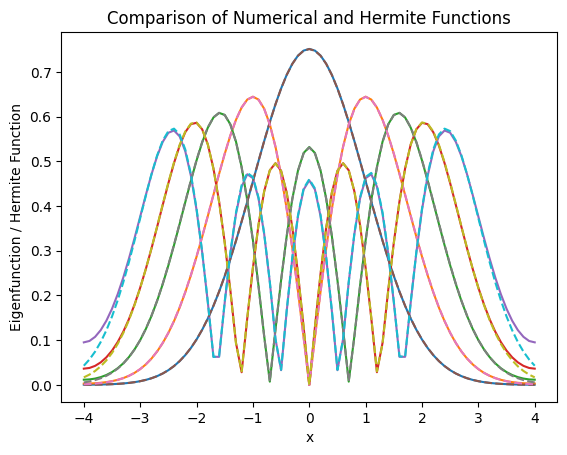

A10: [4.57692814e-08 1.72430946e-07 2.47861359e-07 4.35421335e-07
 1.96490935e-06]
A11: [0.02642089 0.0332466  0.03073891 0.03455712 0.04161945]
A12 [2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
A13: [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]


In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE system based on d²ϕ/dx² - (Kx² - ε)ϕ = 0
def shoot_system(x, phi, epsilon, K):
    return [phi[1], (K * x**2 - epsilon) * phi[0]]

# Normalize the eigenfunction
def normalize(psi, x):
    norm = np.trapz(y = (psi)**2, x = x)  # Numerical integration for normalization
    return psi / np.sqrt(norm)  # Normalize by sqrt of the integral

# Parameters
L = 4.0  # Range boundary (x ∈ [-L, L])
h = 0.1  # Step size
x = np.linspace(-L, L, 81)  # Discretized x values from -L to L
phi0 = [1, 1]  # Initial conditions for ϕ(-L) = 0 and arbitrary ϕ'(-L) = 1
K = 1  # Potential constant, modify this as needed
tol = 1e-4  # Tolerance for convergence

eigenvalues = []
eigenfunctions = []

# Guessed initial eigenvalues for the first 5 modes
epsilon = 0

# Shooting scheme loop over the first 5 modes
for modes in range(1, 6):
    delta_epsilon = 0.1  # Step size for adjusting the eigenvalue
    epsilon += delta_epsilon

    phi0 = [1, np.sqrt(K * L**2 - epsilon)]

    # Begin convergence loop for eigenvalue (epsilon)
    for _ in range(1000):
        sol = solve_ivp(shoot_system, [-L, L], phi0, t_eval=x, args=(epsilon, K))  # Solve the ODE
        psi = sol.y
        phi0 = [1, np.sqrt(K * L**2 - epsilon)]

        if abs(psi[1,-1] + np.sqrt(K * L**2 - epsilon) * psi[0,-1]) < tol:  # If the boundary condition at x = L is satisfied
            #print(f"Eigenvalue for mode {modes}: {epsilon}")
            break  # Convergence reached

        # Adjust epsilon based on the boundary condition at x = L
        if (-1)**(modes + 1) * (psi[1,-1] + np.sqrt(K*L**2 - epsilon) * psi[0,-1]) > 0:
            epsilon += delta_epsilon  # Increase epsilon
        else:
            epsilon -= delta_epsilon / 2  # Refine the step size and decrease epsilon
            delta_epsilon /= 2  # Reduce step size for finer convergence

    # Normalize the eigenfunction after finding eigenvalue
    normalized_psi = normalize(psi[0, :], x)

    # Append the normalized eigenfunction and eigenvalue
    eigenfunctions.append(np.abs(normalized_psi))
    eigenvalues.append(epsilon)

# Convert results to numpy arrays
eigenfunctions_matrix = np.column_stack(eigenfunctions)  # 5-column matrix for eigenfunctions
eigenvalues_vector = np.array(eigenvalues)  # 1x5 vector for eigenvalues

A1new = eigenfunctions_matrix
A2new = eigenvalues_vector







def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

h = np.array((np.ones_like(x), 2*x, 4*x**2 - 2, 8*x**3 - 12*x, 16*x**4 - 48*x**2 + 12))
hermite_functions = np.zeros((len(x), 5))
for j in range(5):
  hermite_functions[:,j] = (np.exp(-x**2 / 2) * h[j,:])/(np.sqrt(factorial(j) * 2**j * np.sqrt(np.pi))).T

hermite_functions = abs(hermite_functions)

for i in range(A3.shape[1]):
    plt.plot(x, A3[:, i], label=f"Numerical Mode {i + 1}")

for i in range(hermite_functions.shape[1]):
    plt.plot(x, hermite_functions[:, i], '--', label=f"Hermite Mode {i + 1}")

plt.xlabel("x")
plt.ylabel("Eigenfunction / Hermite Function")
plt.title("Comparison of Numerical and Hermite Functions")
#plt.legend()
plt.show()

eigenfunction_errors = np.zeros(5)  # Initialize an array for errors
eigenfunction_errors_A3 = np.zeros(5)  # Initialize an array for errors

for i in range(5):
    diff = np.abs(A1new[:, i]) - hermite_functions[:, i]  # Difference between numerical and exact
    eigenfunction_errors[i] = (np.trapz(y=diff**2, x=x))  # Calculate the L2 norm of the difference
    diff2 = np.abs(A3[:, i]) - hermite_functions[:, i]  # Difference between numerical and exact
    eigenfunction_errors_A3[i] = (np.trapz(y=diff2**2, x=x))  # Calculate the L2 norm of the difference

# eigenfunction_errors now contains the error for each eigenfunction

# For eigenvalue errors, assuming A2new is your numerical eigenvalues and
# exact eigenvalues are from the Hermite functions (which are 2n+1 for K=1)
exact_eigenvalues = np.array([2 * n + 1 for n in range(5)])  # For K = 1

eigenvalue_errors = 100 * np.abs((A2new - exact_eigenvalues) / exact_eigenvalues)

# eigenvalue_errors now contains the relative percent error for each eigenvalue

A10 = eigenfunction_errors
A11 = eigenvalue_errors
print("A10:", A10)
print("A11:", A11)


# Assume hermite_functions and A3 are already defined


# For eigenvalue errors, assuming A4 is your numerical eigenvalues and
# exact eigenvalues are from the Hermite functions (which are 2n+1 for K=1)
exact_eigenvalues = np.array([2 * n + 1 for n in range(5)])  # For K = 1

eigenvalue_errors_A3 = 100 * np.abs((A4 - exact_eigenvalues) / exact_eigenvalues)

# eigenvalue_errors_A3 now contains the relative percent error for each eigenvalue

A12 = eigenfunction_errors_A3
A13 = eigenvalue_errors_A3
print("A12", A12)
print("A13:", A13)